**Date:** 14th October 2018
<br>
<br>
**<center>National Research University Higher School of Economics</center>**
**<center>Complex Calculations Programming</center>**

Разработать программу реализующую интегрирование заданной функции методом средних прямоугольников (или иным методом, на выбор) с адаптивной сеткой. Сравнить скорость сходимости данного метода и метода с равномерной сеткой.
*Указание: для выбора "наибольшего" интервала используйте модуль `heapq` из стандартной библиотеки. (При использовании языка `C++`, используйте `std::set`).* 

In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# (start, width)
def create_rectangle(a, b, f, mark):
    rectangle = (a, b - a)
    curr_x = a + rectangle[1]/2
    return (mark*f(curr_x) * rectangle[1], rectangle)

In [3]:
def get_max_element(lst, key=None):
    ''' Find and remove the maximum element from the list.'''
    if key is None:
        key = lambda x: x
        
    element = max(lst, key=key)
    element_index = lst.index(element)
    
    return element, lst[:element_index] + lst[element_index+1 :]

In [4]:
def get_max_element_heapq(lst, key=None):
    """Transform list x into a heap, in-place, in linear time."""
    heapq.heapify(lst)
    
    return lst[-1], lst[:-1]

In [5]:
def adaptive_rectangle_list(f, a, b, f_max, mark, npts):
    
    ''' A list element is (-weight, (start, width))
        Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    '''

    lst = []
    element = create_rectangle(a, b, f, mark)
    lst.append(element)
    
    for _ in range(npts):
        rectangle, lst = f_max(lst, lambda x: -x[0])
        w, (start, width) = rectangle
                
        c = start + width / 2.
        
        first_rectangle = create_rectangle(start, c, f, mark)
        second_rectangle = create_rectangle(c, start + width, f, mark)
        
        lst.append(first_rectangle)
        lst.append(second_rectangle)

    return mark*sum(w for w, r in lst), lst

In [6]:
def midpoint(f, a, b, n):
    h = float(b - a) / n
    result = 0
    for i in range(n):
        result += f(a + 0.5*h + i*h)
    return result * h

In [7]:
'''Function that have to be integrate'''
f = lambda x: np.exp(-x)

In [8]:
'''Exact value of integral'''
F = lambda a, b: -np.exp(-b) + np.exp(-a)

In [9]:
a, b = 0, 20

exact = F(a,b)
print('Exact value = ', exact)
for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adaptive_rectangle_list(f, a, b, get_max_element_heapq, 1, n)
    print ('n, res = ', n, res)

Exact value =  0.9999999979388464
n, res =  5 0.7921436846593407
n, res =  25 0.9903744105507674
n, res =  125 0.9995254841578629
n, res =  250 0.9997636401049373
n, res =  500 0.9998166847139779
n, res =  1000 0.9998277637078664
n, res =  5000 0.9998400734567691


In [10]:
%timeit adaptive_rectangle_list(f, a, b, get_max_element_heapq, 1, npts=1000)

56.4 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


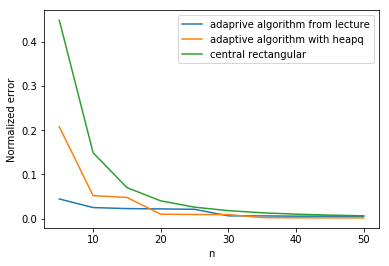

In [11]:
res1 = []
res2 = []
res3 = []
a, b = 0, 20
npts = []
for n in range(5,55,5):
    npts.append(n)
    res1.append(abs(adaptive_rectangle_list(f, a, b, get_max_element_heapq, 1, n)[0]-exact))
    res2.append(abs(midpoint(f,a,b,n)-exact))
    res3.append(abs(adaptive_rectangle_list(f, a, b, get_max_element, -1, n)[0]-exact))
    
plt.figure()

plt.plot(npts, res3, label='adaprive algorithm from lecture')
plt.plot(npts, res1, label='adaptive algorithm with heapq')
plt.plot(npts, res2, label='central rectangular')


plt.legend()
plt.ylabel('Normalized error')
plt.xlabel('n')

plt.show()

Скорость сходимости интегрирования заданной функции методом средних прямоугольников с адаптивной сеткой выше, чем у метода с равномерной сеткой.